In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fetch yahoo data
import yfinance as yf
yf.pdr_override()

In [3]:
symbol = 'GOOGL'
start = '2021-01-01'
end = '2021-12-30'

# Read data 
dataset = yf.download(symbol,start,end)

# Only keep close columns 
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1760.000000,1762.489990,1707.140015,1726.130005,1726.130005,1866200
2021-01-05,1725.089966,1746.829956,1716.900024,1740.050049,1740.050049,1018000
2021-01-06,1700.260010,1743.969971,1696.099976,1722.880005,1722.880005,2329400
2021-01-07,1726.760010,1777.819946,1726.760010,1774.339966,1774.339966,2096800
2021-01-08,1777.160034,1799.359985,1761.219971,1797.829956,1797.829956,1774200


In [10]:
dataset.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-20,19.790001,20.08,19.350000,19.980000,19.980000,62983200
2018-08-21,19.980000,20.42,19.860001,20.400000,20.400000,55629000
2018-08-22,20.280001,20.92,20.209999,20.900000,20.900000,62002700
2018-08-23,21.190001,22.32,21.139999,22.290001,22.290001,113444100
2018-08-24,22.910000,24.00,22.670000,23.980000,23.980000,164328200


In [11]:
len(dataset['Adj Close'].loc[:'2021-01-01'])


1171

In [12]:
weekly_Monday = dataset.asfreq('W-Mon')



In [9]:
weekly_Monday

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-06,4.010000,4.180000,3.990000,4.13,4.13,42398300.0
2014-01-13,4.190000,4.200000,4.090000,4.13,4.13,22856100.0
2014-01-20,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-27,3.480000,3.490000,3.350000,3.41,3.41,31332300.0
2014-02-03,3.430000,3.440000,3.330000,3.33,3.33,22280200.0
...,...,...,...,...,...,...
2018-07-23,16.469999,16.680000,15.900000,16.66,16.66,44940800.0
2018-07-30,19.400000,20.180000,19.309999,19.42,19.42,160823400.0
2018-08-06,18.889999,19.440001,18.459999,19.43,19.43,83579700.0


<AxesSubplot:title={'center':'Weekly Stock Adj Close for Monday'}, xlabel='Date'>

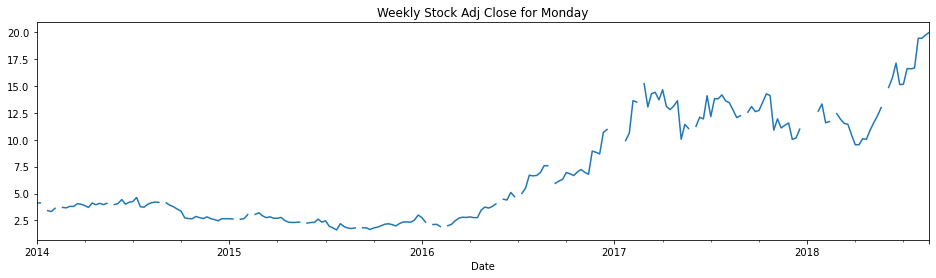

In [13]:
fig, ax = plt.subplots(figsize=(16, 4))
weekly_Monday['Adj Close'].plot(title='Weekly Stock Adj Close for Monday', ax=ax)

In [14]:
weekly_avg = dataset.resample('W').mean()


In [15]:
weekly_avg

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-05,3.9150,3.9900,3.860,3.9750,3.9750,21717800
2014-01-12,4.1440,4.2240,4.072,4.1500,4.1500,33503500
2014-01-19,4.2640,4.3920,4.194,4.2920,4.2920,44944460
2014-01-26,3.8425,3.8625,3.695,3.7325,3.7325,55743225
2014-02-02,3.4780,3.5220,3.418,3.4680,3.4680,22354740
...,...,...,...,...,...,...
2018-07-29,17.1500,17.6520,16.574,17.2380,17.2380,108062420
2018-08-05,18.8400,19.3040,18.454,18.7020,18.7020,92164240
2018-08-12,19.3100,19.6220,18.946,19.3460,19.3460,64191640


<AxesSubplot:title={'center':'Weekly Stock Average for Monday'}, xlabel='Date'>

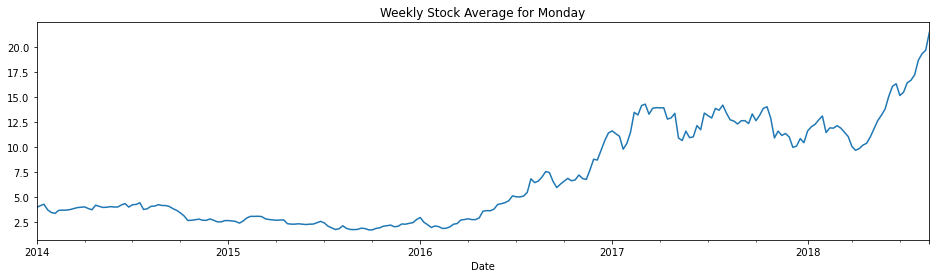

In [16]:
fig, ax = plt.subplots(figsize=(16, 4))
weekly_avg['Adj Close'].plot(title='Weekly Stock Average for Monday', ax=ax)

In [17]:
weekly_first = dataset.resample('W').first()


<AxesSubplot:title={'center':'First Weekly Stock'}, xlabel='Date'>

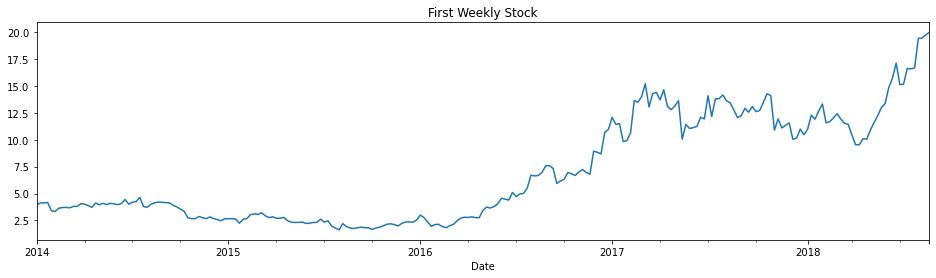

In [18]:
fig, ax = plt.subplots(figsize=(16, 4))
weekly_first['Adj Close'].plot(title='First Weekly Stock', ax=ax)


<AxesSubplot:title={'center':'First Weekly Stock'}, xlabel='Date'>

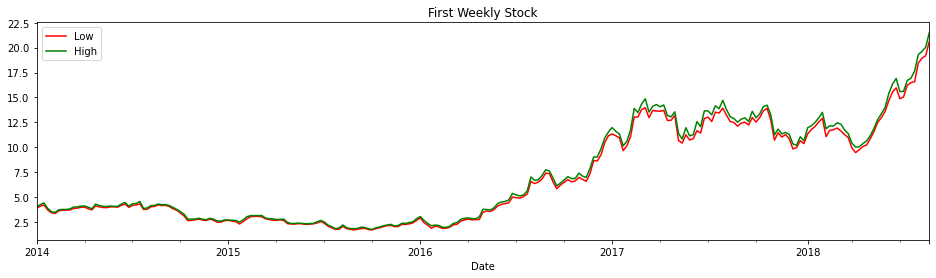

In [19]:
fig, ax = plt.subplots(figsize=(16, 4))
(dataset.groupby(pd.Grouper(freq='W'))[['Low','High']]).mean().plot(color=['Red', 'Green'], ax=ax, title='First Weekly Stock')


In [20]:
business_monthly = dataset.resample('BM')


Date
2014-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
2014-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-05-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-08-29    AxesSubplot(0.125,0.2;0.775x0.68)
2014-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-10-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-11-28    AxesSubplot(0.125,0.2;0.775x0.68)
2014-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-01-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-27    AxesSubplot(0.125,0.2;0.775x0.68)
2015-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-05-29    AxesSubplot(0.125,0.2;0.775x0.68)
2015-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-09-30    AxesSubplot(0.125,0.2

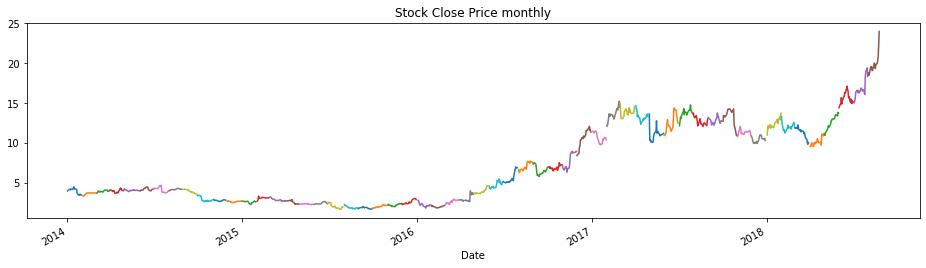

In [21]:
fig, ax = plt.subplots(figsize=(16, 4))
business_monthly['Adj Close'].plot(title='Stock Close Price monthly', ax=ax)

In [22]:
business_monthly['Adj Close'].plot(title='Stock Close Price monthly', ax=ax)


Date
2014-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
2014-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-05-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-08-29    AxesSubplot(0.125,0.2;0.775x0.68)
2014-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-10-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-11-28    AxesSubplot(0.125,0.2;0.775x0.68)
2014-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-01-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-27    AxesSubplot(0.125,0.2;0.775x0.68)
2015-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-05-29    AxesSubplot(0.125,0.2;0.775x0.68)
2015-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2015-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-09-30    AxesSubplot(0.125,0.2